### Projet pluridisciplinaire

# TP3 - Les fonctions en Sage et en Python

Dans ce TP, le but est d'approfondir l'utilisation des **fonctions** en Python et en Sage.
Ce sera l'occasion de voir l'utilisation de quelques commandes spécifiques à Sage
qui permettent de résoudre de nombreuses équations.

## Les fonctions mathématiques dans Sage

Comme nous l'avons vu au 1er TP, Sage permet de définir simplement des
fonctions mathématiques à l'aide d'expressions symboliques comme suit :

In [1]:
f(x) = x^2
plot(f)

Ces fonctions possèdent un certain nombre de méthodes (comme
`integrate`, `derivative`, etc.) listées en tapant `f.` et tabulation.

In [2]:
f.integrate(x)

x |--> 1/3*x^3

In [3]:
f.derivative(x)

x |--> 2*x

En particulier, il est possible d'obtenir le développement de Taylor à l'ordre $N$ d'une fonction à l'aide de la commande `taylor`.

**Exécutez la cellule ci-dessous pour obtenir la documentation de la méthode et les exemples d'utilisations**.

In [0]:
f.taylor?

**Définissez une fonction $g$ non polynomiale, continue et dérivable en 0
(par exemple $\sin(x)$). Tracez cette fonction ainsi que son développement
limité à l'ordre 1, 2 et 3 au voisinage de 0 (avec des couleurs différentes).**

In [107]:
var('x')
g = sin(x)
g.taylor(x, 0, 3)

-1/6*x^3 + x

## Résolution d'équations

Sage permet notamment de résoudre de manière exacte de nombreuses équations.
Dans l'exemple ci-après, on considère une fonction polynomiale dont on
cherche les racines. **Exécutez cet exemple.**


In [4]:
f(x) = x^4 - x^2 - x - 1
solve(f(x) == 0, x)

[x == -1/6*(1/2)^(1/3)*(3*sqrt(31)*sqrt(3) + 29)^(1/3)*(I*sqrt(3) + 1) - 1/3*(1/2)^(2/3)*(-I*sqrt(3) + 1)/(3*sqrt(31)*sqrt(3) + 29)^(1/3) + 1/3, x == -1/6*(1/2)^(1/3)*(3*sqrt(31)*sqrt(3) + 29)^(1/3)*(-I*sqrt(3) + 1) - 1/3*(1/2)^(2/3)*(I*sqrt(3) + 1)/(3*sqrt(31)*sqrt(3) + 29)^(1/3) + 1/3, x == 1/3*(1/2)^(1/3)*(3*sqrt(31)*sqrt(3) + 29)^(1/3) + 2/3*(1/2)^(2/3)/(3*sqrt(31)*sqrt(3) + 29)^(1/3) + 1/3, x == -1]

La fonction `solve` renvoie la liste des solutions de notre équation. Il est également possible de résoudre des systèmes d'équations (même non linéaires) comme suit : 

In [5]:
var('x1 x2 x3')
solve([x1 + x2 - x3 == 0, x2 - x3 == -3 * x1^2 + x3, x3 == 6 * x2 - x1], x1, x2, x3)

[[x1 == 0, x2 == 0, x3 == 0], [x1 == (4/5), x2 == (8/25), x3 == (28/25)]]

**Remarque** : L'instruction initiale permet de définir symboliquement `x1`, `x2` et `x3`
comme des inconnues. Elle est indispensable pour définir le système qu'on souhaite résoudre.

**Donnez un système permettant de trouver le (ou les) points d'intersections de 2 cercles définis par :**
 * un cercle de centre $(0, 0)$ et de rayon 2
 * un cercle de centre $(0.5, 0.75)$ et de rayon 2.

**Résolvez ce système.**

**Tracez ces deux cercles ainsi que les points d'intersection (avec `point2d`)
pour vérifier que la solution est correcte.** 

In [11]:
r = 2
var('x y')
z = solve([x^2 + y^2 == r^2, (x - 0.5)^2+ (y - 0.75)^2 == r^2 ], x, y, solution_dict=True)
x1 = z[0][x]
y1 = z[0][y]
x2 = z[1][x]
y2 = z[1][y]
circle((0,0), r, color='red') + circle((0.5,0.75), r, color='blue') + point2d((x1,y1)) + point2d((x2, y2))

Si maintenant le deuxième cercle a pour centre $(3, 5)$ et toujours rayon 2,
**tracez les cercles; voyez-vous un point d'intersection ?**

*Remarque : les questions qui ne demandent pas de code sont là pour vous faire réfléchir,
pas besoin d'écrire une réponse.*

**Résolvez l'équation formelle pour calculer les points d'intersection avec Sage.**

Sage trouve des solutions, pourquoi ne les voit-on pas sur le dessin ?

A présent, **remplacez le deuxième cercle par une ellipse** (vous trouverez l'équation
sur internet, on vous laisse libre dans le choix des paramètres). Comme tout à l'heure :
 * **Calculez avec le solveur formel les points d'intersection**.
 * **Tracez le cercle et l'ellipse ainsi que leurs points d'intersection**
   (Sage a une fonction `ellipse`).

In [12]:
r = 1
var('x y')
z = solve([x^2 + y^2 == r^2, (x/2)^2 + (y/1)^2 == 1], x, y, solution_dict=True)
x1 = z[0][x]
x2 = z[1][x]
y1 = z[0][y]
y2 = z[1][y]
circle((0,0), 1, color='red') + ellipse((0,0),2,1, color='blue') + point2d((x1,y1)) + point2d((x2, y2))

In [3]:
ellipse((0,0),2,1)

Par ailleurs, lorsque l'on cherche les solutions d'une équation de type
$f(x, y) = 0$, on peut utiliser `implicit_plot` et voir sa solution de
façon graphique.

Ainsi, l'exemple suivant affiche tous les points $(x, y)$ tels que $x^2 - y^4 + 1 = 0$.

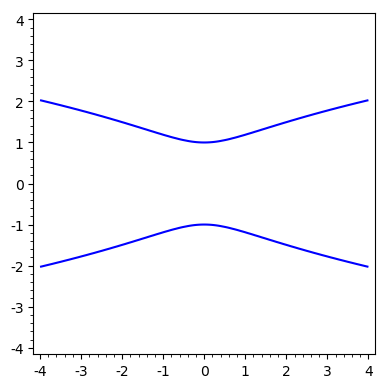

In [6]:
var('y')
f(x, y) = x^2 - y^4 + 1
implicit_plot(f, (x, -4, 4), (y, -4, 4))

**Utilisez `implicit_plot` pour afficher un cercle de rayon 1.**

In [4]:
var('x y')
f(x, y) = x^2 + y^2 == 1
implicit_plot(f, (x,-1,1), (y,-1,1))

Sage permet aussi de résoudre des équations différentielles. **Exécutez l'exemple suivant.**

In [5]:
var('t')
f = function('f')(t)
equation_differentielle = (diff(f, t) == f)
sol = desolve(equation_differentielle, f, ics=[0, 1])
print(sol)

e^t


Expliquons un peu cet exemple. Ici, on commence par déclarer une variable $t$ et une fonction $f$ dépendant de $t$. La fonction $f(t)$ est ainsi définie symboliquement et on peut l'utiliser pour écrire notre équation différentielle. 

La fonction `diff(f,t)` permet de dériver $f$ par rapport à $t$. Pour obtenir une dérivée d'ordre supérieur, il suffit d'écrire `diff(f,t,2)` pour l'ordre 2 par exemple. De plus, le terme `ics` correspond à la définition des conditions initiales (Initial Conditions). La première valeur de la liste est la valeur initiale de $t$ et la seconde celle de $f(t)$.

**Résolvez l'équation différentielle $f''(t) = 3 f(t) - 4$  avec comme conditions initiales : $t = 0$,  $f(0) =  1$ et $f'(0) =0$.**

In [6]:
var('t')
f = function('f')(t)
equation_differentielle = (diff(f, t, 2) == 3*f-4)
sol = desolve(equation_differentielle, f, ics=[0, 0, 0])
print(sol)

-2/3*e^(sqrt(3)*t) - 2/3*e^(-sqrt(3)*t) + 4/3


Nous propopns dans ce petit exercice de résoudre le problème suivant : une masse est accrochée à un ressort selon le schéma suivant 

|Mur|--/\/\/\/\/\--($M$)

On note $f(t)$ la position de la masse à l'instant $t$.
Le ressort a les caractéristiques suivantes :

 * il est au repos lorsque la masse est à une distance $d>0$ du bord
 * et il possède une raideur $k>0$

L'équation modèle vérifiée par $f(t)$, en supposant que la masse glisse
parfaitement, est : $f^{''}(t) = -k(f(t)-d)$.

**Résolvez cette équation et affichez la solution. À l'aide de la commande `animate`,
affichez une animation simple permettant de voir la masse (dessinée par exemple par
un cercle) bouger au cours du temps. Pour les paramètres, prenez $d=1$ et $k=1$.**

Remarque : que devez-vous choisir comme conditions initiales ?

In [49]:
var('t')
f = function('f')(t)
equation_differentielle = (diff(f, t, 2) == -f-1)
sol = desolve(equation_differentielle, f, ics=[0,0,0])
print(sol)

cos(t) - 1


In [50]:
posPoint = []
for i in range(0.5, 0.5):
    posPoint.append(sol(i))

TypeError: 'sage.rings.real_mpfr.RealLiteral' object cannot be interpreted as an integer

## Fonctions Python

Nous venons de (re)voir les fonctions mathématiques en Sage. Dans le TP précédent,
nous avons abordé les fonctions Python. Nous allons revoir un peu ce concept pour
voir les différences avec les fonctions Sage (fonctions mathématiques). Commençons
par un exemple simple : écrivez un appel de la fonction suivante pour qu'elle retourne 13.


In [9]:
def ma_fonction(x, y):
    resultat = x + y
    return resultat

In [10]:
ma_fonction(3, 2)

5

**Définissez une fonction appelée `somme_diff` prenant en argument 2 nombres, et qui retourne**
 * **la somme des 2 si le premier nombre est pair**
 * **la différence des 2 si le premier nombre est impair**

Indication : on pourra utiliser le symbole `%` pour connaître la parité d'un nombre.

In [17]:
def somme_diff(a, b):
    if a % 2 == 0:
        return a + b
    else:
        return a - b

**Vérifiez que vous obtenez le résultat attendu :**

In [18]:
somme_diff(4, 2)  # doit afficher 6

6

In [19]:
somme_diff(5, 3)  # doit afficher 2

2

La cellule suivante est une cellule de test, quand vous l'exécutez, rien ne doit s'afficher !

In [20]:
assert somme_diff(4, 2) == 6
assert somme_diff(5, 3) == 2
assert somme_diff(10, 3) == 13
assert somme_diff(15, 28) == -13

Voilà ce qui se passe quand un test ne passe pas :

In [21]:
assert somme_diff(2, 4) == -2

AssertionError: 

**Proposez ci-dessous une version corrigée du test ci-dessus.**

In [22]:
assert somme_diff(2, 4) == 6

Les fonctions Python sont fondamentalement différentes des fonctions mathématiques
vues précédemment. Pour vous en convaincre **exécutez le code suivant** :

In [23]:
f(x) = x^2
print(type(f))
print(type(ma_fonction))

<class 'sage.symbolic.expression.Expression'>


NameError: name 'ma_fonction' is not defined

L'une des conséquences importante de cette différence est que les fonctions Python
ne possèdent pas les mêmes méthodes que les expressions symboliques définissant
les fonctions Sage. Par conséquent, on ne peut pas utiliser des instructions du
type `integrate` ou `diff` sur les fonctions Python.

**Écrivez une fonction Python qui prend en argument une fonction mathématique $f$
et un entier $N$, et qui renvoie le tracé du développement de Taylor à l'ordre $N$
de $f$ autour de 0. Testez votre code en traçant sur un même graphique $f$
et son développement de Taylor.**

In [99]:
def taylor(g, n):
    var('x')
    h = g
    f = h.taylor(x, 0, n)
    return plot(f, x, -5, 5) + plot(h, x, -5, 5)

In [101]:
taylor(e^x, 1)

On considère une suite d'instructions données par une liste du type `['h','b','g','d']`
indiquant une succesion de déplacements 'haut', 'bas', 'gauche' et 'droite'. Une boule
placée en $(0, 0)$ se déplace selon cette suite d'instructions. On suppose qu'à chaque
déplacement, elle bouge d'une distance $1$.

**Écrivez une fonction `chemin_boule`** qui prend en paramètre la liste d'instructions et
renvoie **une liste de tracés** représentant les différentes positions de la boule.

Puis **exécutez** l'exemple ci-dessous pour voir l'animation correspondante.

In [74]:
def chemin_boule(liste):
    boule = []
    x = 0
    y = 0
    n = len(liste)
    for i in range(0, n):
        if liste[i]== 'h':
            y +=1
        elif liste[i] == 'b':
            y -=1
        elif liste[i] == 'd':
            x +=1
        elif liste[i] == 'g':
            x -=1
        boule.append(plot(point2d([x,y])))
    return animate(boule)


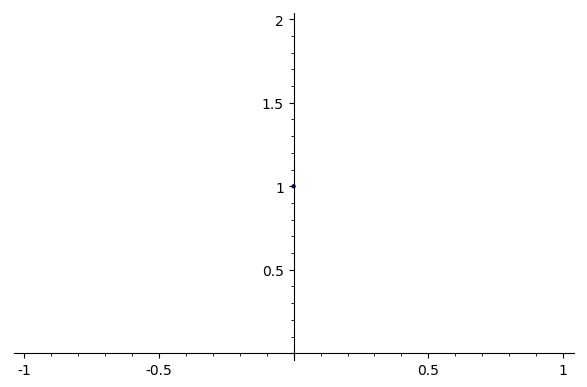

In [75]:
chemin_boule(['h', 'b', 'g', 'd'])

In [77]:
# testez d'abord si la fonction s'exécute et renvoie bien quelque chose
chemin_boule(["h", "h", "d", "b", "d", "d", "h", "g", "g", "b", "b"])

In [76]:
# maintenant, testons l'animation
chemin_boule(["h", "h", "d", "b", "d", "d", "h", "g", "g", "b", "b"])

## Simulation d'un système à 2 masses oscillantes.

Pour finir, revenons à la résolution d'équations différentielles. Jusqu'à présent,
nous avons vu comment faire une *résolution exacte* ce qui n'est pas toujours possible.
Nous allons voir comment utiliser Sage pour faire une *résolution numérique* approchée
d'un système d'équations.

**Problème**

On étudie le cas de 2 masses liées entres elles par deux ressorts comme représenté ci-dessous :

|Mur|--/\/\/\/\/\--($M_1$)--/\/\/\/\/\--($M_2$)

On note $x_1(t)$ et $x_2(t)$ les positions des masses $M_1$ et $M_2$.
Les deux ressorts ont les caractéristiques suivantes :
* le premier ressort, de raideur $k_1$, est au repos lorsque sa longueur est égale à $d_1$,
* le second ressort, de raideur $k_2$, est au repos lorsque sa longueur est égale à $d_2$.

Les équations vérifiées par $x_1$ et $x_2$ sont alors :
$$\begin{cases}
x''_1(t) = -k_1 (x_1 - d_1) + k_2 (x_2 - x_1 - d_2)\\[8pt]
x''_2(t) = -k_2 (x_2 - x_1 - d_2)
\end{cases}$$

On cherche à évaluer la position des deux ressorts au cours du temps.

**Comment faire ?**

Nous allons utiliser la fonction de Sage `desolve_system_rk4`. Celle-ci est conçue
pour résoudre des systèmes d'équations présentés de la façon suivante :

$$\begin{cases}
    a'_1(t) = \dots \\[8pt]
    a'_2(t) = \dots \\[8pt]
    a'_3(t) = \dots \\[8pt]
    \dots
\end{cases}$$

Ça ne correspond pas tout à fait à notre système. Le premier travail est donc
de *ré-écrire* notre problème différement. On introduit deux nouvelles variables :
$v_1 = x_1'$ et $v_2 = x_2'$.

**Sur papier**. Posez $a_1 = x_1$, $a_2 = x_2$, $a_3 = v_1$ et $a_4 = v_2$ puis
écrivez un système d'équations compatibles avec `desolve_system_rk4`. C'est-à-dire :

$$
\begin{cases}
    a'_1(t) = \dots \\[8pt]
    a'_2(t) = \dots \\[8pt]
    a'_3(t) = \dots \\[8pt]
    a'_4(t) = \dots
\end{cases}
$$

où vous n'utilisez dans la partie droite que les variables $a_1$, $a_2$, $a_3$ et $a_4$
(pas le droit d'écrire $a_i'$ ou $a_i''$ dans la partie droite) et les paramètres
$k_1$, $k_2$, $d_1$, $d_2$. Remarque : vous avez bien sûr besoin de l'équation
différentielle présentée au début.

**Passons de l'expression sur papier à la résolution sur machine**

On commence par définir les variables Python dont nous aurons besoin :
 * $a_1$, $\dots$, $a_4$ ainsi que $t$ sont des variables formelles ;
 * $k_1$, $k_2$, $d_1$, $d_2$ sont des constantes liées aux ressorts :
   on les met tous à 1 (il faudrait les initialiser avec les valeurs
   réelles des ressorts qu'on veut modéliser).


In [5]:
var('a1, a2, a3, a4, t')
k1, k2, d1, d2 = 1, 1, 1, 1

Exécutez la cellule suivante, lisez la documentation de la fonction et essayez d'identifer les différents paramètres.

In [0]:
desolve_system_rk4?

* le premier paramètre `des` correspond à la partie **droite**
  du système d'équations. C'est la partie que vous venez de trouver.
  Ce sera donc une **liste Python** dont la première valeur sera
  **l'expression** de $a_1'$, puis la deuxième l'expression de $a_2'$, etc.
* le second paramètre `vars` correspond aux variables de la partie
  **gauche** du système. Ce sera donc la **liste Python** `[a1, a2, a3, a4]`
* le paramètre `ivar` sert à déclarer la variable supplémentaire $t$
* le paramètre `ics` correspond aux conditions initiales. C'est une
  **liste python** dont la première valeur est la valeur initiale de $t$,
  puis de $a_1$, puis $a_2$, etc. On veut que commencer tel que le premier
  ressort soit à **distance 1** et le second ressort à **distance 3**,
  les deux ont une vitesse initiale nulle.
* le paramètre `end_points` donne la valeur de $t$ à laquelle on arrêtera
  le calcul. On choisit $t = 10$.
* le paramètre `step` donne la taille de chaque pas de calcul, on choisit $0.5$.

Ci-dessous, on vous initialise une partie des paramètres, **exécutez-la**.
Dans la cellule suivante, **initialisez les paramètres manquants `des` et `ics`**
pour que la cellule d'appel à la fonction `desolve_system_rk4` fonctionne.

In [22]:
vars = [a1, a2, a3, a4]
ivar = t
end_points = 10
step = 0.5

In [23]:
des = [a3, a4, (-k1*(a1-d1)+k2*(a2-a1-d1)), -k2*(a2-a1-d2)]
ics = [0, k1, k2, d1, d2]

In [27]:
R = desolve_system_rk4(des=des, vars=vars, ivar=ivar, ics=ics,  end_points=end_points, step=step)

Vérifiez dans la cellule suivante que `R` est bien une liste de taille 21.

In [29]:
type(R)

<class 'type'>

In [25]:
len(R)

21

**Que contient `R` ?** On a fait une résolution numérique, on n'obtient donc pas
un résultat exact sous forme de fonction. `R` est une **liste de liste**.
Par exemple, on a :

In [28]:
R[0] # au temps 0, a_1 = 1, a_2 = 3, a_3 = 0, a_4 = 0

[0, 1, 1, 1, 1]

In [29]:
R[1] # au temps 0.5, ...

[0.5,
 1.361979166666667,
 1.619791666666667,
 0.4427083333333334,
 1.455729166666667]

In [30]:
R[2] # au temps 1, ...

[1.0,
 1.464877658420139,
 2.414516872829861,
 0.01777479383680564,
 1.665852864583333]

In [31]:
R[3] # au temps 3,...

[1.5,
 1.446139582881221,
 3.217930528852674,
 -0.02632209989759661,
 1.481777632677997]

Les valeurs qui nous intéressent sont celles de $x_1$ et $x_2$,
c'est-à-dire $a_1$ et $a_2$. On cherche à faire une animation
montrant le mouvement des ressorts.

**Complétez la fonction Python `trace_ressorts`** qui prend en paramètre
la liste `R` et renvoie une **liste de tracés** du système à chaque temps
donné (on trace les deux ressorts au bon endroit).

In [39]:
def trace_ressorts(R):
    """
    Renvoie la liste des tracés des ressorts à chaque temps.

    INPUT:

    - ``R`` -- le résultat du solveur
    """
    positionsPoints = []
    for temps in R:
        positionsPoints.append(plot(point2d([temps[3],0]) + point2d([temps[4],0])))

    return positionsPoints


In [40]:
# vérifions que la fonction s'exécute
P = trace_ressorts(R)
P

[Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting 

In [41]:
# et est-ce que l'animation fonctionne ?
animate(P)

In [1]:
dico = {}

In [4]:
dico[5] = [1,2,3]

In [5]:
dico

{5: [1, 2, 3], 'thomas': 10}